
Perform analysis on the transferability score 


In [1]:
import matplotlib.pyplot as plt
from math import log, sqrt
import os
import pandas as pd
from statistics import median

In [2]:
"""
Color map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score

Wasserstein distance is calculated as the final step error from Sinkhorn OT
"""


'\nColor map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score\n\nWasserstein distance is calculated as the final step error from Sinkhorn OT\n'

In [3]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/mimic")
print(f"Will save outputs to {output_dir}")
summary_path = os.path.join(output_dir, "selected_summary_mimic.csv")
summary_df = pd.read_csv(summary_path, header=0, index_col=0)
label_codes = list(summary_df.index)


Will save outputs to /home/wanxinli/deep_patient/outputs/mimic


In [4]:
""" 
Read each label score file
"""

stat_df = pd.DataFrame(columns=['label_code','trans_target_f1', 'target_f1', 'delta_f1', 'trans_target_accuracy', 'delta_accuracy', 'div_score', 'w_dist', 'log_w_dist'])
stat_df = stat_df.set_index('label_code')

for code in label_codes:
    code_path = os.path.join(output_dir, "exp3_"+code+"_score.csv")
    code_df = pd.read_csv(code_path, header=0, index_col=0)
    stat_df.at[code, 'div_score'] = median(list(code_df['transfer_score']))
    stat_df.at[code, 'inverse_div_score'] = 1/stat_df.at[code, 'div_score']
    stat_df.at[code, 'w_dist'] = median(list(code_df['w_dist']))
    stat_df.at[code, 'sqrt_w_dist'] = sqrt(stat_df.at[code, 'w_dist'])
    stat_df.at[code, 'log_w_dist'] = log(stat_df.at[code, 'w_dist'])
    stat_df.at[code, 'inverse_log_w_dist'] = 1/stat_df.at[code, 'log_w_dist']
    stat_df.at[code, 'trans_target_f1'] = median(list(code_df['trans_source_f1']))
    stat_df.at[code, 'delta_f1'] = stat_df.at[code, 'trans_target_f1'] - median(list(code_df['source_f1']))
    stat_df.at[code, 'trans_target_accuracy'] = median(list(code_df['trans_source_accuracy']))
    stat_df.at[code, 'delta_accuracy'] = stat_df.at[code, 'trans_target_accuracy'] - median(list(code_df['source_accuracy']))



In [5]:
stat_df

,trans_target_f1,target_f1,delta_f1,trans_target_accuracy,delta_accuracy,div_score,w_dist,log_w_dist,inverse_div_score,sqrt_w_dist,inverse_log_w_dist
label_code,,,,,,,,,,,
008.45,0.628857,NaN,0.024567,0.635,0.01,113.460863,0.0,-18.540067,0.008814,0.000094,-0.053937
041.11,0.605594,NaN,0.032704,0.61,0.035,149.2946,0.0,-18.52252,0.006698,0.000095,-0.053988
042,0.531286,NaN,0.031296,0.5325,0.025,165.461945,0.0,-18.549108,0.006044,0.000094,-0.053911
038.11,0.663239,NaN,-0.013764,0.67,-0.02,120.518726,0.0,-18.509121,0.008297,0.000096,-0.054027
038.9,0.714993,NaN,-0.020361,0.725,-0.02,99.834247,0.0,-18.513006,0.010017,0.000095,-0.054016
...,...,...,...,...,...,...,...,...,...,...,...
E878.0,0.658232,NaN,0.030582,0.6625,0.0225,147.078537,0.0,-18.511714,0.006799,0.000096,-0.054020
E878.1,0.599492,NaN,0.033265,0.61,0.025,131.696641,0.0,-18.528312,0.007593,0.000095,-0.053971
E878.2,0.63,NaN,0.025833,0.635,0.015,126.932743,0.0,-18.541142,0.007878,0.000094,-0.053934


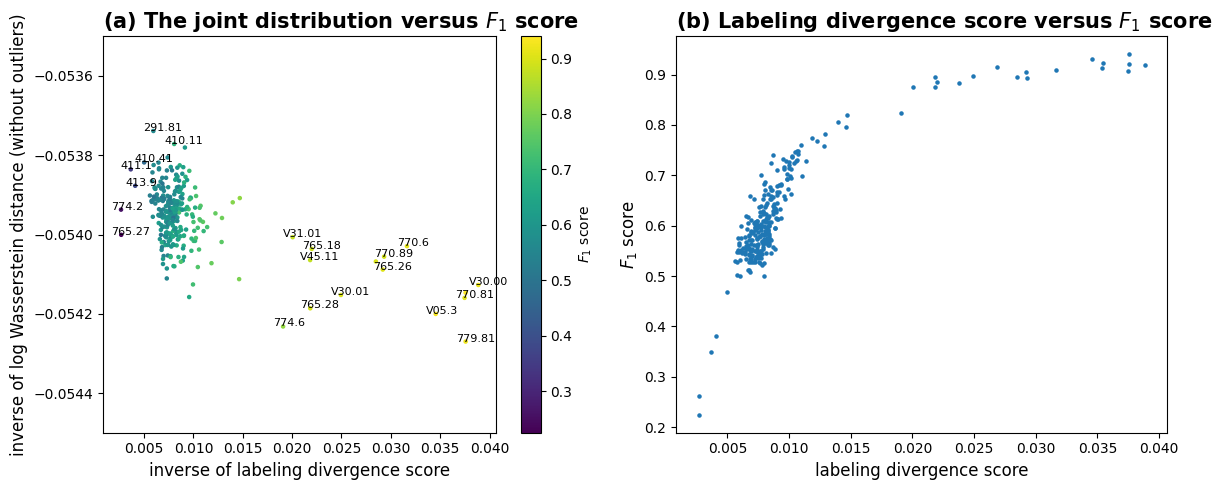

In [36]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
x = list(stat_df['inverse_div_score'])
y =  list(stat_df['inverse_log_w_dist'])

plt.scatter(x, y, s=5, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
texts = list(stat_df.index)
valid_texts = ['V30.00', '765.27', '774.2', '413.9', '411.1', '410.41', '410.11', '291.81', \
              'V31.01', '765.18', 'V45.11', '765.28', '774.6', 'V30.01', '770.89', '765.26', '770.6',\
                 '770.81', 'V05.3', '779.81', '770.6']

for i, _ in enumerate(texts):
    if texts[i] not in valid_texts:
        texts[i] = ''
for i in range(len(x)):
    plt.annotate(texts[i], (x[i]-0.001, y[i]), fontsize=8)
        
plt.xlabel('inverse of labeling divergence score', fontsize=12)
plt.ylabel('inverse of log Wasserstein distance (without outliers)', fontsize=12)
plt.ylim(-0.0545, -0.0535)
plt.colorbar(label=r'$F_1$ score')
plt.title(r'(a) The joint distribution versus $F_1$ score', loc='left', fontweight="bold", fontsize=15)


plt.subplot(1,2,2)
plt.scatter(list(stat_df['inverse_div_score']),list(stat_df['trans_target_f1']), s=5)
plt.xlabel('labeling divergence score', fontsize=12)
plt.ylabel(r'$F_1$ score', fontsize=12)
plt.title(r'(b) Labeling divergence score versus $F_1$ score', loc='left', fontweight="bold", fontsize=15)
plt.tight_layout()

fig_path = os.path.join(output_dir, "exp3_w_dist.pdf")
plt.savefig(fig_path, bbox_inches = 'tight')
plt.show()



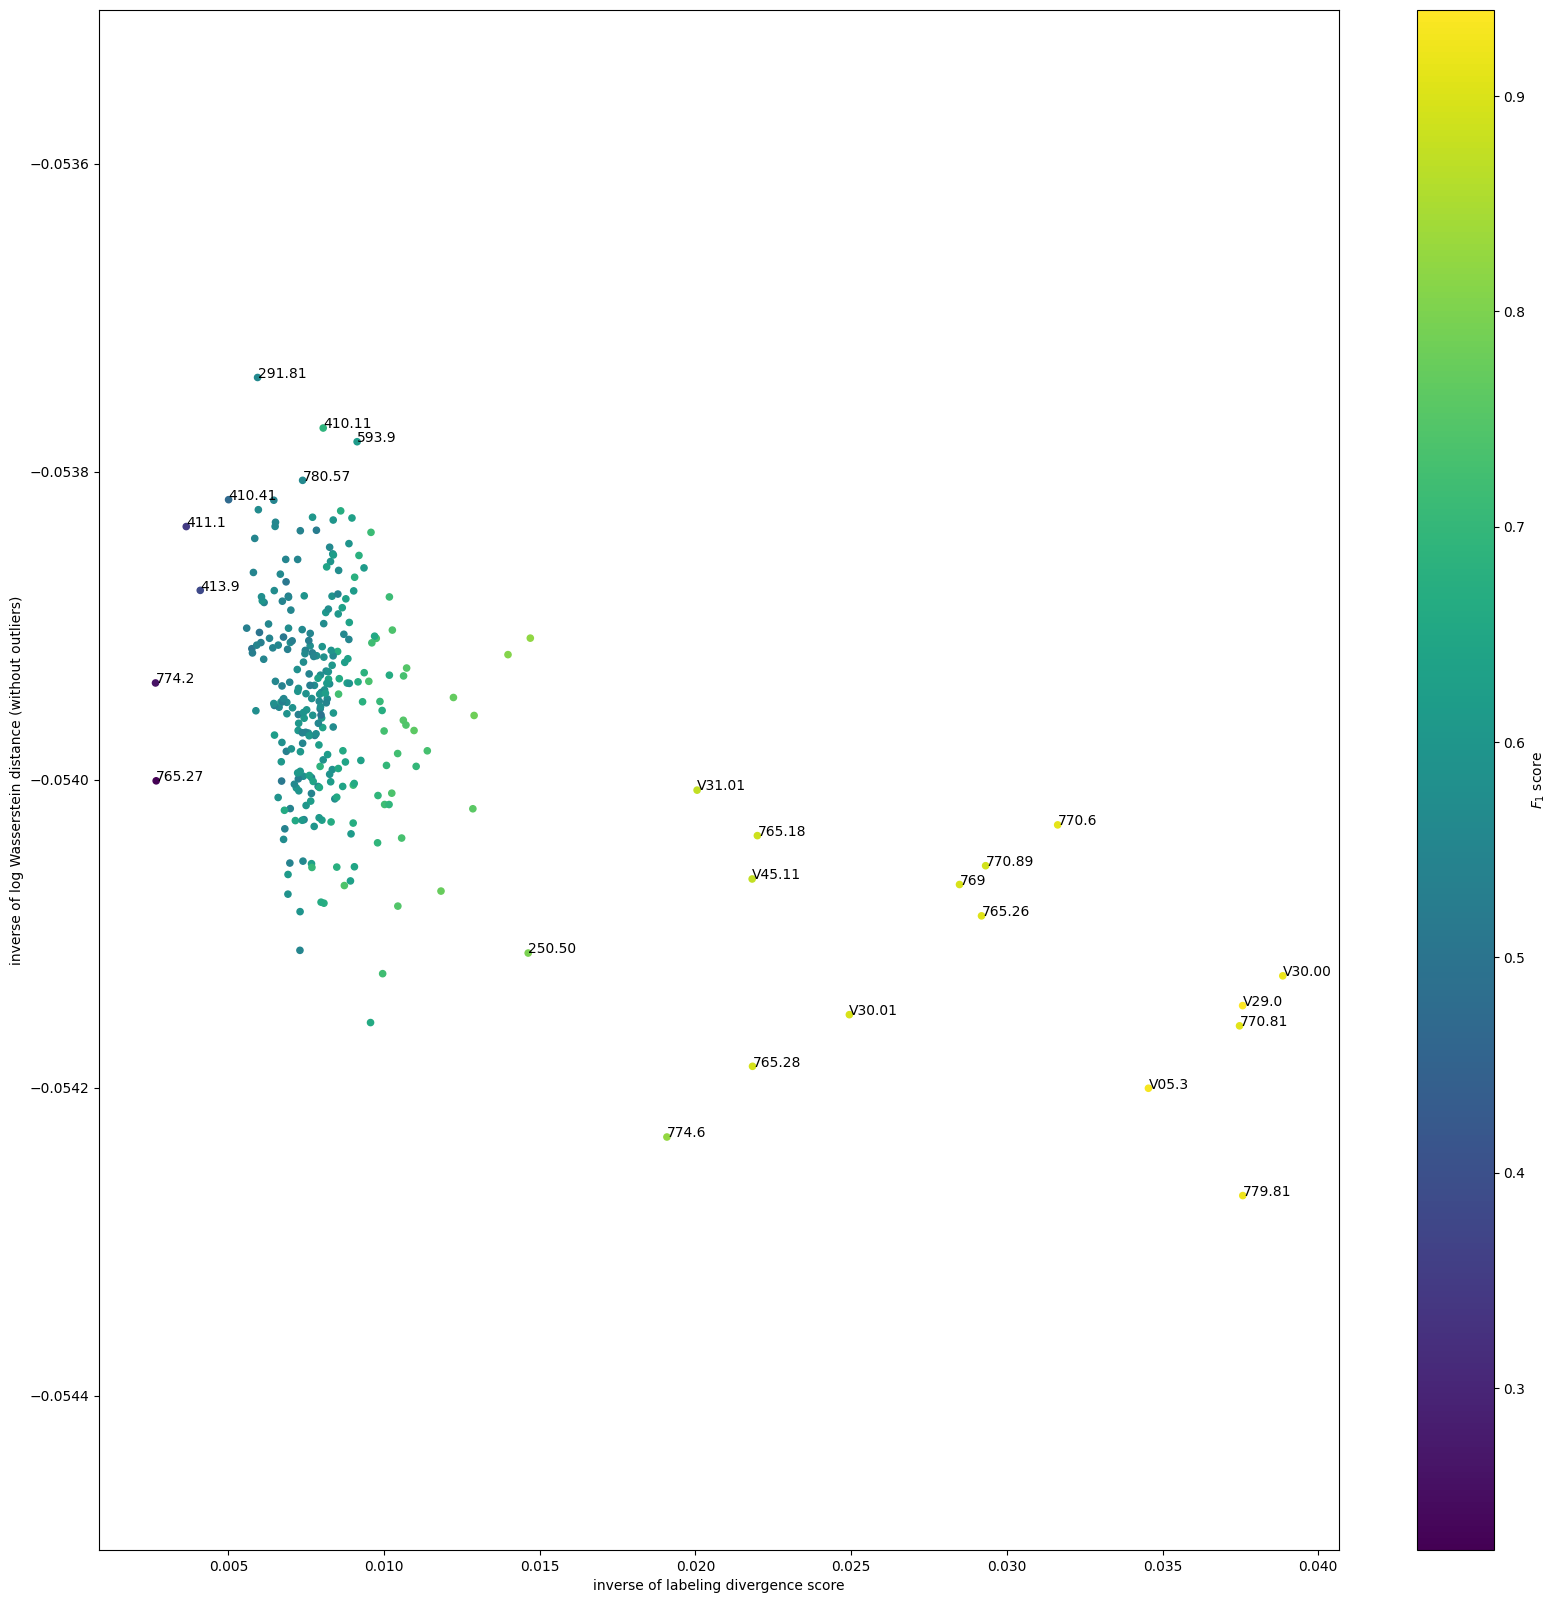

In [7]:
""" 
Examining the ICD code on top left and right right
"""

plt.figure(figsize=[20, 20])
texts = list(stat_df.index)
valid_texts = ['V30.00', '765.27', '774.2', '413.9', '411.1', '410.41', '780.57', '410.11', '593.9', '291.81', \
              '250.50', 'V31.01', '765.18', 'V45.11', '765.28', '774.6', 'V30.01', '769', '770.89', '765.26', '770.6',\
                 'V29.0', '770.81', 'V05.3', '779.81', '770.6']

for i, _ in enumerate(texts):
    if texts[i] not in valid_texts:
        texts[i] = ''


x = list(stat_df['inverse_div_score'])
y =  list(stat_df['inverse_log_w_dist'])
plt.scatter(x, y, s=20, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
for i in range(len(x)):
    plt.annotate(texts[i], (x[i], y[i]), fontsize=10)
plt.xlabel('inverse of labeling divergence score')
plt.ylabel('inverse of log Wasserstein distance (without outliers)')
plt.ylim(-0.0545, -0.0535)



plt.colorbar(label=r'$F_1$ score')

plt.show()

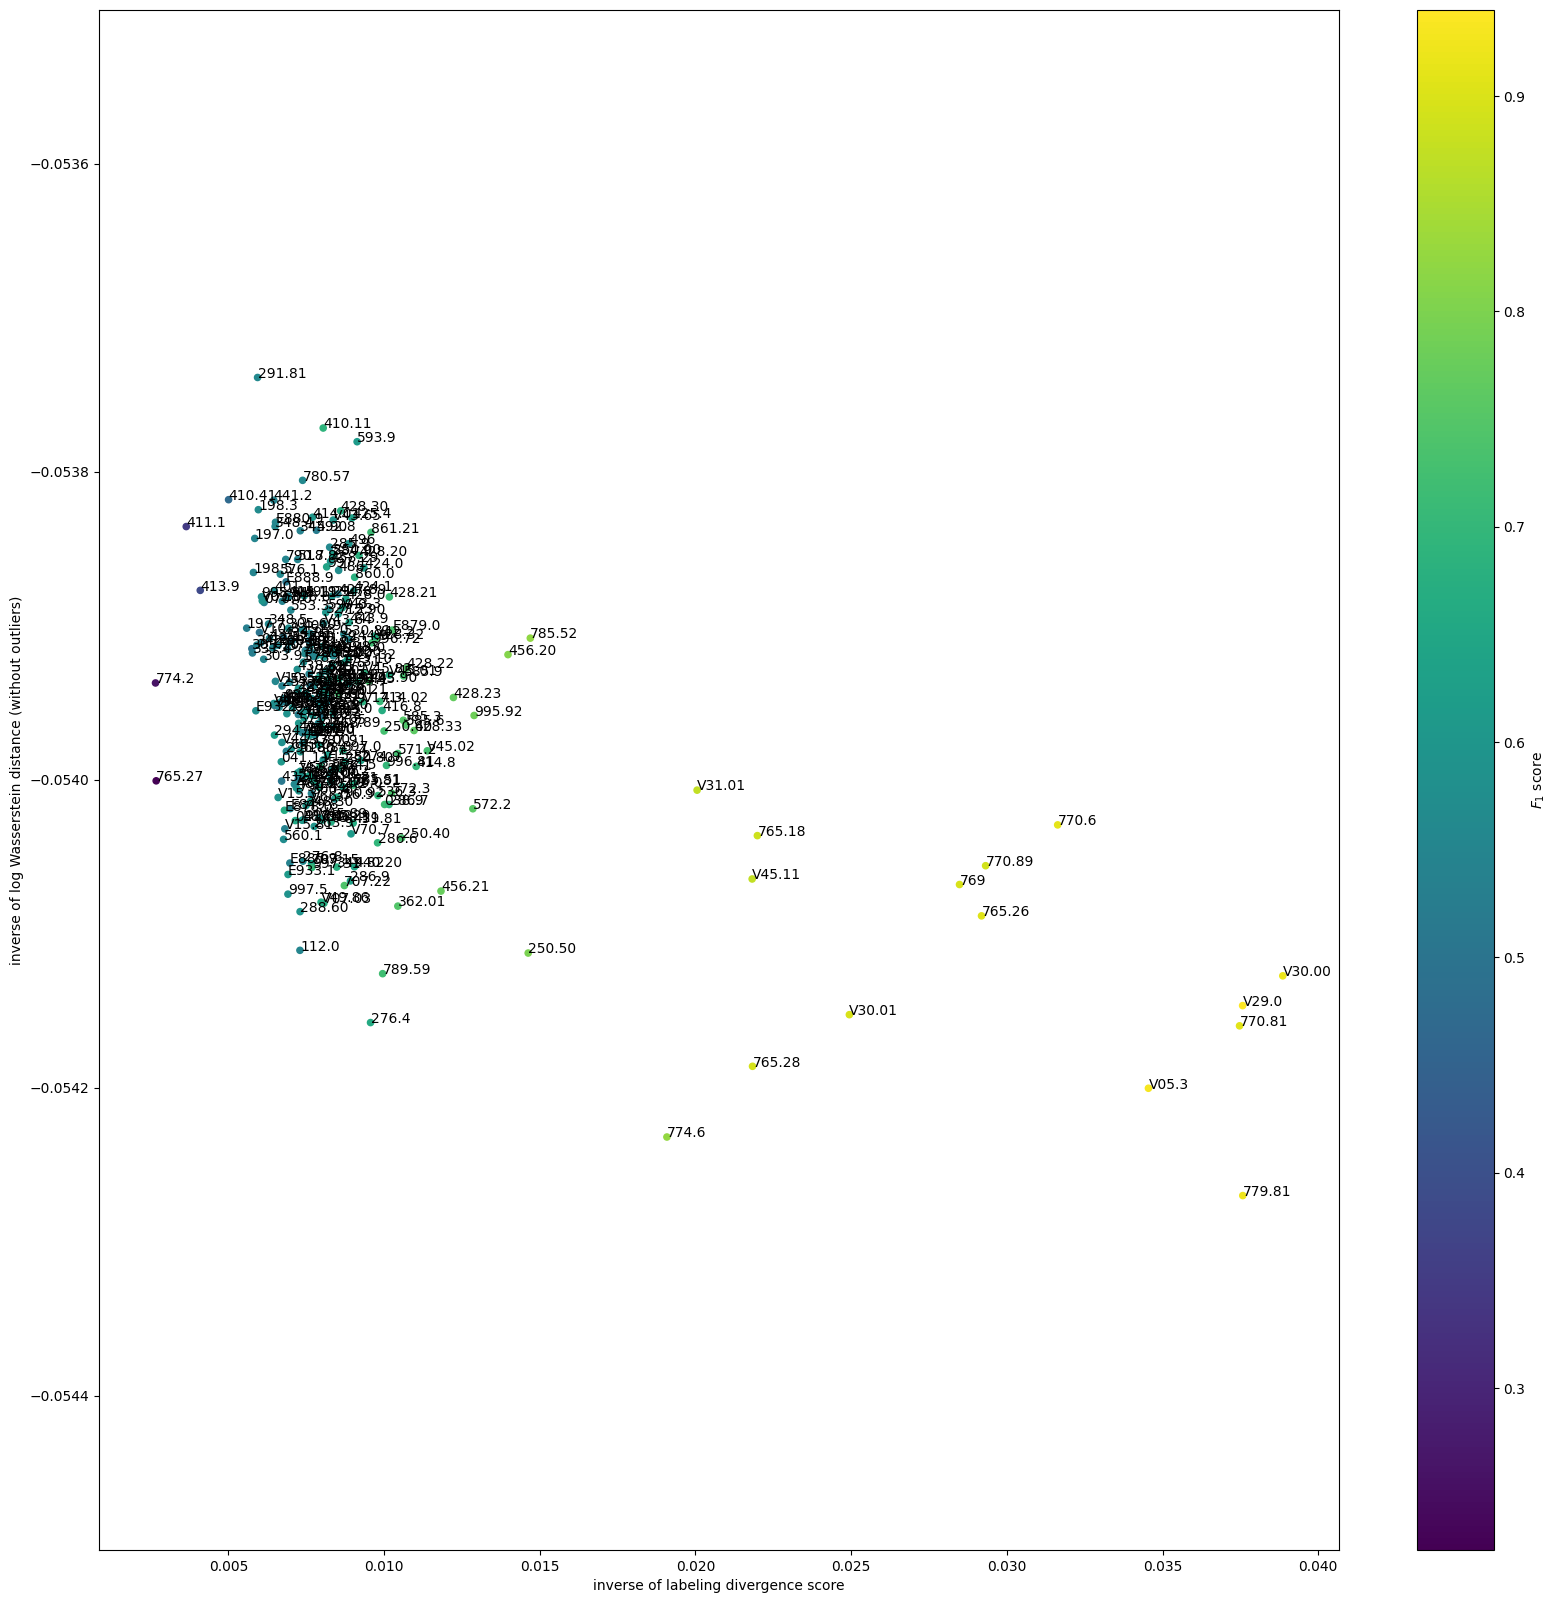

In [8]:
""" 
Examining the ICD code on top left and right right
"""

plt.figure(figsize=[20, 20])
texts = list(stat_df.index)
valid_texts = ['765.27', '774.2', '413.9', '411.1', '410.41', '441.2', '780.57', '410.11', '593.9', '291.81', \
              '250.50', 'V31.01', '765.18', 'V45.11', '765.28', '774.6', 'V30.01', '769', '770.89', '765.26', '770.6'\
                'V30.00', 'V29.0', '770.81', 'V05.3', '779.81']


x = list(stat_df['inverse_div_score'])
y =  list(stat_df['inverse_log_w_dist'])
plt.scatter(x, y, s=20, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
for i in range(len(x)):
    plt.annotate(texts[i], (x[i], y[i]), fontsize=10)
plt.xlabel('inverse of labeling divergence score')
plt.ylabel('inverse of log Wasserstein distance (without outliers)')
plt.ylim(-0.0545, -0.0535)



plt.colorbar(label=r'$F_1$ score')

plt.show()